In [38]:
import pandas as pd
import os
# os.getenv
from dotenv import load_dotenv
import hvplot.pandas
import requests
import json
from collect_contracts import *
from utils import *

In [39]:
load_dotenv()

rarify_api_key = os.getenv("RARIFY_API_KEY")
display(type(rarify_api_key))

str

### Generate the formatted lists of collections 1 through 50 (excluding some, see the notes.txt file) so that it can be used for querying

In [40]:
contracts =  collect_top_100(rarify_api_key)
write_json_file(contracts, 'contracts.json')



'JSON file written to current directory'

### Query each collection from the API to obtain the contract address

### Create a dataframe for each of the set of collections

In [41]:
collections_df = fetch_top_50_collections_data(contracts, rarify_api_key)

In [42]:
collections_df

c36442b4a4522e871399cd717abdd847ab11fe88                        \
                                          avg_price   max_price min_price   
time                                                                        
2017-06-23                                      NaN         NaN       NaN   
2017-06-24                                      NaN         NaN       NaN   
2017-06-25                                      NaN         NaN       NaN   
2017-06-26                                      NaN         NaN       NaN   
2017-06-27                                      NaN         NaN       NaN   
...                                             ...         ...       ...   
2022-07-30                                 1.261931   62.556471  0.000006   
2022-07-31                                 0.926984   46.797444  0.000001   
2022-08-01                                 1.985820   97.697524  0.000001   
2022-08-02                                 1.488913  121.799999  0.000001   
2022-08-03                                 1.699245   53.025755  0.000053   

                                              \
           trades unique_buyers       volume   
time                                           
2017-06-23    NaN           NaN          NaN   
2017-06-24    NaN           NaN          NaN   
2017-06-25    NaN           NaN          NaN   
2017-06-26    NaN           NaN          NaN   
2017-06-27    NaN           NaN          NaN   
...           ...           ...          ...   
2022-07-30  627.0         378.0   791.231297   
2022-07-31  566.0         347.0   524.673177   
2022-08-01  765.0         439.0  1519.152726   
2022-08-02  776.0         527.0  1155.396702   
2022-08-03  152.0         112.0   258.285289   

           81ae0be3a8044772d04f32398bac1e1b4b215aa8                      \
                                          avg_price max_price min_price   
time                                                                      
2017-06-23                                      NaN       NaN       NaN   
2017-06-24                                      NaN       NaN       NaN   
2017-06-25                                      NaN       NaN       NaN   
2017-06-26                                      NaN       NaN       NaN   
2017-06-27                                      NaN       NaN       NaN   
...                                             ...       ...       ...   
2022-07-30                                283.00000  284.0000    282.00   
2022-07-31                                  0.01000    0.0100      0.01   
2022-08-01                                286.00000  290.0000    281.00   
2022-08-02                                  0.01025    0.0105      0.01   
2022-08-03                                      NaN       NaN       NaN   

                   ... 2953399124f0cbb46d2cbacd8a89cf0599974963          \
           trades  ...                                min_price  trades   
time               ...                                                    
2017-06-23    NaN  ...                                      NaN     NaN   
2017-06-24    NaN  ...                                      NaN     NaN   
2017-06-25    NaN  ...                                      NaN     NaN   
2017-06-26    NaN  ...                                      NaN     NaN   
2017-06-27    NaN  ...                                      NaN     NaN   
...           ...  ...                                      ...     ...   
2022-07-30    3.0  ...                                 0.000661  1372.0   
2022-07-31    3.0  ...                                 0.000618  1395.0   
2022-08-01    5.0  ...                                 0.000638  1069.0   
2022-08-02    2.0  ...                                 0.000634  1524.0   
2022-08-03    NaN  ...                                 0.000628   527.0   

                                    08d7c0242953446436f34b4c78fe9da38c73668d  \
           unique_buyers     volume                                avg_price 

### Create a pct_change dataframe for each of the set of collections we acquired

In [43]:
valid_contracts = find_valid_contracts(collections_df, contracts)
valid_contracts

{'34d85c9cdeb23fa97cb08333b511ac86e1c4e258': {'name': 'Otherdeed',
  'network': 'ethereum',
  'unique_owners': 35047,
  'tokens': 100000},
 'bc4ca0eda7647a8ab7c2061c2e118a18a936f13d': {'name': 'BoredApeYachtClub',
  'network': 'ethereum',
  'unique_owners': 6443,
  'tokens': 10000},
 '06799a1e4792001aa9114f0012b9650ca28059a3': {'name': 'Unidentified contract - qZSVpmUhF7',
  'network': 'ethereum',
  'unique_owners': 6,
  'tokens': 16},
 'ed5af388653567af2f388e6224dc7c4b3241c544': {'name': 'Azuki',
  'network': 'ethereum',
  'unique_owners': 5077,
  'tokens': 10000},
 '60e4d786628fea6478f785a6d7e704777c86a7c6': {'name': 'MutantApeYachtClub',
  'network': 'ethereum',
  'unique_owners': 12958,
  'tokens': 19425},
 'bce3781ae7ca1a5e050bd9c4c77369867ebc307e': {'name': 'goblintown',
  'network': 'ethereum',
  'unique_owners': 4540,
  'tokens': 9999},
 '160c404b2b49cbc3240055ceaee026df1e8497a0': {'name': 'projectPXN',
  'network': 'ethereum',
  'unique_owners': 6206,
  'tokens': 10000},
 '49c

In [76]:
all_whale_ratios = find_whale_ratio(contracts)
whale_ratios = find_whale_ratio(valid_contracts)
write_json_file(whale_ratios, 'whale_ratios.json')
whale_ratios

{'34d85c9cdeb23fa97cb08333b511ac86e1c4e258': {'name': 'Otherdeed',
  'whale_ratio': 2.853311267726196},
 'bc4ca0eda7647a8ab7c2061c2e118a18a936f13d': {'name': 'BoredApeYachtClub',
  'whale_ratio': 1.5520720161415489},
 '06799a1e4792001aa9114f0012b9650ca28059a3': {'name': 'Unidentified contract - qZSVpmUhF7',
  'whale_ratio': 2.6666666666666665},
 'ed5af388653567af2f388e6224dc7c4b3241c544': {'name': 'Azuki',
  'whale_ratio': 1.9696671262556629},
 '60e4d786628fea6478f785a6d7e704777c86a7c6': {'name': 'MutantApeYachtClub',
  'whale_ratio': 1.4990739311622163},
 'bce3781ae7ca1a5e050bd9c4c77369867ebc307e': {'name': 'goblintown',
  'whale_ratio': 2.202422907488987},
 '160c404b2b49cbc3240055ceaee026df1e8497a0': {'name': 'projectPXN',
  'whale_ratio': 1.6113438607798904},
 '49cf6f5d44e70224e2e23fdcdd2c053f30ada28b': {'name': 'CloneX',
  'whale_ratio': 2.066076003415884},
 '306b1ea3ecdf94ab739f1910bbda052ed4a9f949': {'name': 'Beanz',
  'whale_ratio': 2.7937263688559026},
 '8a90cab2b38dba80c64b773

In [45]:
pct_chg_df = find_pct_change(collections_df, contracts)
pct_chg_df = pct_chg_df.iloc[:, -(len(valid_contracts)):]
pct_chg_df

,Otherdeed_pct_chg,BoredApeYachtClub_pct_chg,Unidentified contract - qZSVpmUhF7_pct_chg,Azuki_pct_chg,MutantApeYachtClub_pct_chg,goblintown_pct_chg,projectPXN_pct_chg,CloneX_pct_chg,Beanz_pct_chg,Doodles_pct_chg,...,Karafuru Gachapon_pct_chg,Cool Cats_pct_chg,mcgoblintownwtf_pct_chg,mfer_pct_chg,Bored Ape Yacht Club_pct_chg,pieceofshit_pct_chg,VeeFriends Series 2_pct_chg,Bound NFT CloneX_pct_chg,adidas Originals Into the Metaverse_pct_chg,ElitePunks Voxel Club_pct_chg
,,,,,,,,,,,...,,,,,,,,,,
time,,,,,,,,,,,,,,,,,,,,,
2017-06-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-30,0.220517,0.137853,NaN,0.012938,-0.039903,-0.413942,0.007202,-0.214605,-0.378554,-0.049762,...,-0.029381,0.000000,-0.076656,0.211001,-0.081222,-0.080268,0.108236,0.0,-0.046254,-0.402379
2022-07-31,-0.452488,0.008642,NaN,0.000000,0.022178,-0.137029,-0.156970,0.155056,-0.540195,0.001718,...,-0.013884,-0.318229,-0.137515,-0.254465,-0.033901,-0.046346,-0.133929,0.0,-0.027449,-0.214885


In [46]:
pct_chg_df["top_collections_basket_pct_chg"] = pct_chg_df[pct_chg_df.columns].mean(axis=1)

In [47]:
betas = find_beta(pct_chg_df, valid_contracts)
betas_series = pd.Series(betas)
betas_series.dropna()
betas_series


Otherdeed_beta                              0.190735
BoredApeYachtClub_beta                      0.762539
Unidentified contract - qZSVpmUhF7_beta          NaN
Azuki_beta                                  0.242080
MutantApeYachtClub_beta                     0.070391
goblintown_beta                             0.642252
projectPXN_beta                             0.104358
CloneX_beta                                 0.076774
Beanz_beta                                  1.114886
Doodles_beta                                0.193914
Moonbirds_beta                              0.791217
Unidentified contract - 9hbqYS3cPz_beta          NaN
Chimpers_beta                              -0.022111
Boki_beta                                   0.147191
Murakami.Flowers_beta                       0.743540
Moonbirds Oddities_beta                     0.277249
Genesis_beta                                0.642214
Dooplicator_beta                            0.147829
ShitBeast_beta                              0.

In [48]:
std_devs = find_std_devs(pct_chg_df, valid_contracts)
std_devs_cor = std_devs.copy()
std_devs_copy = std_devs.dropna()
std_devs


Otherdeed_std_dev                                0.497664
BoredApeYachtClub_std_dev                        0.297560
Unidentified contract - qZSVpmUhF7_std_dev            NaN
Azuki_std_dev                                    0.352970
MutantApeYachtClub_std_dev                       0.132944
goblintown_std_dev                               0.813952
projectPXN_std_dev                               0.348924
CloneX_std_dev                                   0.202146
Beanz_std_dev                                    0.896391
Doodles_std_dev                                  0.381228
Moonbirds_std_dev                                0.530597
Unidentified contract - 9hbqYS3cPz_std_dev            NaN
Chimpers_std_dev                                 0.284629
Boki_std_dev                                     0.409376
Murakami.Flowers_std_dev                         0.507906
Moonbirds Oddities_std_dev                       0.271141
Genesis_std_dev                                  0.934627
Dooplicator_st

In [49]:
std_devs["mean"] = std_devs.mean()
std_devs.sort_values()

Bound NFT AZUKI_std_dev                          0.000000
Bound NFT CloneX_std_dev                         0.001301
MutantApeYachtClub_std_dev                       0.132944
adidas Originals Into the Metaverse_std_dev      0.159201
CloneX_std_dev                                   0.202146
CPG Pop_std_dev                                  0.224143
Nouns_std_dev                                    0.225821
GODA Mint Pass_std_dev                           0.263205
Moonbirds Oddities_std_dev                       0.271141
Chimpers_std_dev                                 0.284629
Dooplicator_std_dev                              0.291724
BoredApeYachtClub_std_dev                        0.297560
Cool Cats_std_dev                                0.299772
projectPXN_std_dev                               0.348924
mfer_std_dev                                     0.351025
Azuki_std_dev                                    0.352970
Doodles_std_dev                                  0.381228
Boki_std_dev  

<AxesSubplot:>

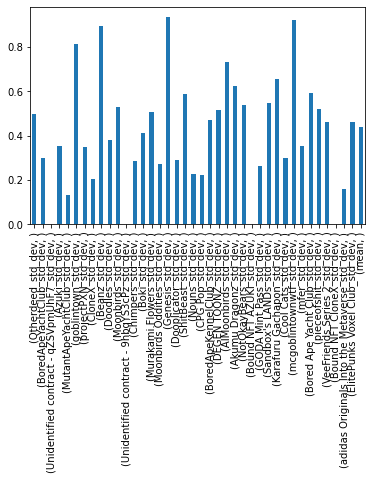

In [50]:
std_devs.plot(kind="bar")

In [51]:
whale_ratios_cor = {}
for con in whale_ratios:
    whale_ratios_cor[whale_ratios[con]['name']] = whale_ratios[con]['whale_ratio']
whale_ratios_cor
whale_ratios_cor = pd.Series(whale_ratios_cor)

In [68]:
import math
std_devs_lst = []
counter_lst = []
counter = 0
for i in std_devs_cor:
    if math.isnan(i):
        counter_lst.append(counter)
    else:
        std_devs_lst.append(i)
    counter += 1

std_devs_lst
counter_lst


[2, 11]

In [70]:
whale_ratios_lst = []
for i in whale_ratios_cor:
    whale_ratios_lst.append(i)

del whale_ratios_lst[2]
del whale_ratios_lst[11]
whale_ratios_lst

[2.853311267726196,
 1.5520720161415489,
 1.9696671262556629,
 1.4990739311622163,
 2.202422907488987,
 1.6113438607798904,
 2.066076003415884,
 2.7937263688559026,
 1.9007793195210037,
 1.5098897780462026,
 2676.0,
 2.201245400509482,
 1.6749608491386812,
 1.6,
 2.282583884957772,
 1.685241776020133,
 3.4129692832764507,
 1.6965811965811965,
 1.292830540037244,
 1.707325746799431,
 2.310972438897556,
 2.73224043715847,
 2.465483234714004,
 3.1240237425804436,
 5.589041095890411,
 1.36986301369863,
 5.752413226535223,
 5.233849259757739,
 1.761651603756867,
 3.0858827865831184,
 1.774256373937677,
 2.8478520286396183,
 8.583690987124463,
 2.4336867643094617,
 4.2439024390243905,
 0.000392580233585239,
 0.8391302166845681]

In [81]:
avg_prices = find_avg_price(collections_df, contracts)
avg_prices = avg_prices.iloc[0]
avg_prices_lst = []
for i in avg_prices:
    avg_prices_lst.append(i)
avg_prices_lst
    

[2.6296002378854637,
 175.34784886290322,
 289.06417663318786,
 65.97685960526316,
 5.926362095744681,
 56.56856506209844,
 0.0,
 67.35371327843143,
 15.135230870646765,
 33.65179224390245,
 143.72905625742575,
 15.140557542772871,
 4.186379824324324,
 1.0952111222222227,
 14.028650760683757,
 3.157644319999998,
 11.124741879310337,
 23.926985592592587,
 215.03307768421055,
 0.043867677704194266,
 6.353707040983609,
 86.21136967666666,
 0.9804360919732446,
 1674.6836394000002,
 0.4425284426229507,
 0.27970758430717885,
 467.2150560632912,
 0.0,
 127.28494320895521,
 1.9953909733333335,
 0.5298946710526318,
 3.9462966888888866,
 3.096850068493152,
 0.3432524823529412,
 3.07817912345679,
 0.5465103333333333,
 98.4592869305994,
 1.1272259230769228,
 6.597625841849154,
 0.25900936363636373,
 0.8018923648648648,
 154.13576444186046,
 1.0645321597633135,
 0.17522944285714284,
 0.2568910634920636,
 0.15248032051282057,
 1.15670837755102,
 1858.1480910000002,
 7.070314326530615,
 3.52342600000

In [77]:
all_whale_ratios_cor = {}
for con in all_whale_ratios:
    all_whale_ratios_cor[all_whale_ratios[con]['name']] = all_whale_ratios[con]['whale_ratio']
all_whale_ratios_cor = pd.Series(all_whale_ratios_cor)
all_whale_ratios_lst = []
for i in all_whale_ratios_cor:
    all_whale_ratios_lst.append(i)

In [72]:
import numpy as np
del whale_ratios_lst[10]
del std_devs_lst[10]
np.corrcoef(whale_ratios_lst, std_devs_lst)

array([[ 1.        , -0.11216951],
       [-0.11216951,  1.        ]])

In [82]:
np.corrcoef(all_whale_ratios_lst, avg_prices_lst)

array([[ 1.        , -0.03592469],
       [-0.03592469,  1.        ]])

In [84]:
pd.DataFrame(std_devs_lst, whale_ratios_lst)

,0
2.853311,0.497664
1.552072,0.297560
1.969667,0.352970
1.499074,0.132944
2.202423,0.813952
1.611344,0.348924
2.066076,0.202146
2.793726,0.896391
1.900779,0.381228
1.509890,0.530597
